Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
from scipy.stats import nct, gamma, kstest
import matplotlib.pyplot as plt

Zadanie 9


Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Kołmogorowa w przypadku weryfikacji zgodności z rozkładem NIG oraz z
rozkładem gamma o różnych wartościach parametrów. Należy porównać wyniki klasycznego sposobu
testowania i testowania z wykorzystaniem PIT (probability integral transform). Uzyskane wyniki
należy przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- parametrów generowanego rozkładu.


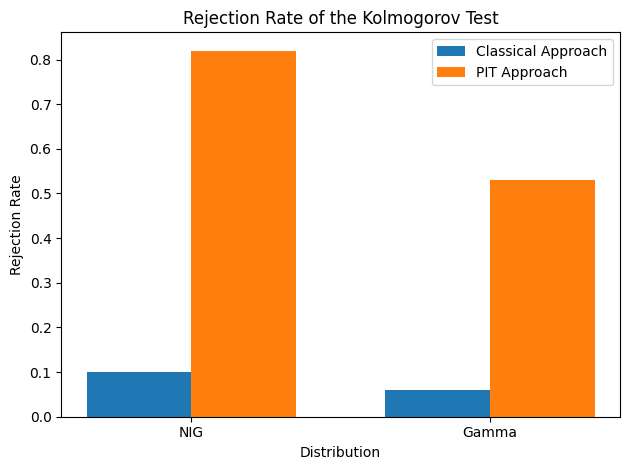

In [2]:
def compute_rejection_rate(samples, distribution, parameter_values, alpha=0.05, method='classical'):
    rejection_count = 0
    sample_size = len(samples)

    for i in range(sample_size):
        if method == 'classical':
            _, p_value = kstest(samples[i:i+1], distribution, args=parameter_values)
            if p_value < alpha:
                rejection_count += 1
        elif method == 'pit':
            uniform_samples = np.sort(samples[i:i+1]) / sample_size
            _, p_value = kstest(uniform_samples, 'uniform')
            if p_value < alpha:
                rejection_count += 1

    return rejection_count / sample_size

# Generowanie danych z rozkladu NIG
sample_size = 100
df = 5
loc = 0
scale = 1
np.random.seed(411052)
samples_nig = nct.rvs(df, loc, scale, size=(sample_size,))

# Generowanie danych z rozkladu Gamma
shape = 2
scale = 1
samples_gamma = gamma.rvs(shape, scale, size=(sample_size,))

# Ustawienie parametrow
parameter_values_nig = (df, loc, scale)
parameter_values_gamma = (shape, 0, scale)

# Obliczenie odsetku odrzucen metoda klasyczna
rejection_rate_classical_nig = compute_rejection_rate(samples_nig, 'nct', parameter_values_nig)
rejection_rate_classical_gamma = compute_rejection_rate(samples_gamma, 'gamma', parameter_values_gamma)

# Obliczenie odsetku odrzucen metoda PIT
rejection_rate_pit_nig = compute_rejection_rate(samples_nig, 'nct', parameter_values_nig, method='pit')
rejection_rate_pit_gamma = compute_rejection_rate(samples_gamma, 'gamma', parameter_values_gamma, method='pit')

# Utworzenie wykresu
distributions = ['NIG', 'Gamma']
rejection_rates_classical = [rejection_rate_classical_nig, rejection_rate_classical_gamma]
rejection_rates_pit = [rejection_rate_pit_nig, rejection_rate_pit_gamma]

x = np.arange(len(distributions))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejection_rates_classical, width, label='Classical Approach')
rects2 = ax.bar(x + width/2, rejection_rates_pit, width, label='PIT Approach')

ax.set_xlabel('Distribution')
ax.set_ylabel('Rejection Rate')
ax.set_title('Rejection Rate of the Kolmogorov Test')
ax.set_xticks(x)
ax.set_xticklabels(distributions)
ax.legend()

fig.tight_layout()

plt.show()
